In [1]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [3]:
df = pd.read_csv('12.csv',delimiter=";", header=None)

In [4]:
df

,0,1
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
19995,im having ssa examination tomorrow in the morn...,sadness
19996,i constantly worry about their fight against n...,joy
19997,i feel its important to share this info for th...,joy
19998,i truly feel that if you are passionate enough...,joy


In [ ]:
df = pd.read_csv('12.csv',delimiter=";", header=None)
df = df[:10000]
df.columns = ["sentence","mood"]
df.head(10)

,sentence,mood
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,joy
9,i feel romantic too,love


In [ ]:
df.mood.unique()
y = df.mood.map({'sadness':0, 'anger':1, 'love':2, 'surprise':3, 'fear':4, 'joy':5})
y.value_counts()

5    3362
0    2894
1    1344
4    1192
2     829
3     379
Name: mood, dtype: int64

In [ ]:

text_train, text_test, y_train, y_test = train_test_split(df.sentence, y, stratify=y, random_state=42, test_size=0.2)


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
spacy.load('en_core_web_sm')

In [ ]:
def spacy_tokenizer(sentence):
  doc = nlp(sentence)
  mytokens = [word for word in doc if not word.is_stop]
  mytokens = [word.lemma_ for word in mytokens]
  return mytokens

In [ ]:
def spacy_process(text):
  doc = nlp(text)

  lemma_list = []
  for token in doc:
    lemma_list.append(token.lemma_)
  # print('Tokenizer+Lemmatize:')
  # print(lemma_list)
  
  # Filter the stopword
  filtered_sentence = []
  for word in lemma_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
      filtered_sentence.append(word)

  # print(filtered_sentence)
  return filtered_sentence

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def NLTK_tokenizer(sentence):
  tokens=nltk.word_tokenize(sentence)
  filtered_sentence = [word for word in tokens if not word in stop_words]
  lemmatizer_wordnet = WordNetLemmatizer()
  lemmatized_words = [lemmatizer_wordnet.lemmatize(word, pos='v') for word in filtered_sentence]
  return lemmatized_words

In [ ]:
cv_t1 = TfidfVectorizer(tokenizer=spacy_tokenizer)
cv_t2 = TfidfVectorizer(tokenizer=spacy_process)
cv_t3 = TfidfVectorizer(tokenizer=NLTK_tokenizer)
cv_c1 = CountVectorizer(tokenizer=spacy_tokenizer)
cv_c2 = CountVectorizer(tokenizer=spacy_process)
cv_c3 = CountVectorizer(tokenizer=NLTK_tokenizer)

cv_t1.fit_transform(df.sentence)
x_train_t1 = cv_t1.transform(text_train)
x_test_t1 = cv_t1.transform(text_test)
results_t1 = {}

cv_t2.fit_transform(df.sentence)
x_train_t2 = cv_t2.transform(text_train)
x_test_t2 = cv_t2.transform(text_test)
results_t2 = {}

cv_t3.fit_transform(df.sentence)
x_train_t3 = cv_t3.transform(text_train)
x_test_t3 = cv_t3.transform(text_test)
results_t3 = {}

cv_c1.fit_transform(df.sentence)
x_train_c1 = cv_c1.transform(text_train)
x_test_c1 = cv_c1.transform(text_test)
results_c1 = {}

cv_c2.fit_transform(df.sentence)
x_train_c2 = cv_c2.transform(text_train)
x_test_c2 = cv_c2.transform(text_test)
results_c2 = {}

cv_c3.fit_transform(df.sentence)
x_train_c3 = cv_c3.transform(text_train)
x_test_c3 = cv_c3.transform(text_test)
results_c3 = {}

In [ ]:
list1 = [[x_train_t1,x_test_t1,results_t1],[x_train_t2,x_test_t2,results_t2],[x_train_t3,x_test_t3,results_t3],[x_train_c1,x_test_c1,results_c1],[x_train_c2,x_test_c2,results_c2],[x_train_c3,x_test_c3,results_c3]]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('clf', RandomForestClassifier()),
])
parameter_space = {
"clf__max_features": [2, 10, 'auto'],
'clf__n_estimators': (50, 100),
'clf__criterion': ('gini', 'entropy'),
"clf__min_samples_leaf": [2, 4, 6],
}

grid = GridSearchCV(pipeline, parameter_space,n_jobs=-1, verbose=1)
for i,j,k in list1:
  print(k)
  grid.fit(i,y_train)
  print("Best score: %0.3f" % grid.best_score_)
  preds = grid.predict(j)
  perf = precision_recall_fscore_support(y_test, preds, average="macro")
  k["RandomForestClassifier"] = perf[:3]
  k['RandomForestClassifier']=list(k['RandomForestClassifier'])
  k['RandomForestClassifier'].append(accuracy_score(preds, y_test))
  print()
  print("Predict")
  print("Precision:",perf[0])
  print("Recall:",perf[1])
  print("F1-Measure:",perf[2])
  print("Accuracy: {}".format(accuracy_score(preds, y_test))) 

{}
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best score: 0.820

Predict   (0, 9225)	0.20072027098510256
  (0, 9041)	0.3882923912368883
  (0, 8902)	0.19420310250381212
  (0, 8550)	0.20958558238479957
  (0, 8297)	0.12905603999341406
  (0, 8219)	0.16349501230936161
  (0, 8126)	0.3931205656680362
  (0, 7224)	0.1876354661206547
  (0, 6033)	0.2764889968850942
  (0, 4900)	0.13832683415358274
  (0, 3652)	0.1990970410741777
  (0, 3532)	0.21426904802481508
  (0, 3058)	0.035578256027786255
  (0, 2408)	0.4720515723012993
  (0, 2272)	0.29821580807477865
Precision: 0.8227317741261421
Recall: 0.750273025185427
F1-Measure: 0.7801463022670515
Accuracy: 0.821
{}
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best score: 0.819

Predict   (0, 9176)	0.19139287917530667
  (0, 8994)	0.37024859699501117
  (0, 8855)	0.1851785609423599
  (0, 8504)	0.19984622305156924
  (0, 8252)	0.12305885672671447
  (0, 8174)	0.15589746358509748
  (0, 8082)	0.374852408065028
  (0, 6000)	0.263

In [ ]:

pipeline = Pipeline([                 
    ('knn', KNeighborsClassifier()),
])
parameter_space = {
    "knn__n_neighbors": [10,11,12,13,14,15],
    "knn__weights": ["uniform","distance"],
}

grid = GridSearchCV(pipeline, parameter_space,n_jobs=-1, verbose=1)
for i,j,k in list1:
  grid.fit(i,y_train)
  print(k)
  print("Best score: %0.3f" % grid.best_score_)
  preds = grid.predict(j)
  perf = precision_recall_fscore_support(y_test, preds, average="macro")
  k["KNeighborsClassifier"] = perf[:3]
  k['KNeighborsClassifier']=list(k['KNeighborsClassifier'])
  k['KNeighborsClassifier'].append(accuracy_score(preds, y_test))
  print()
  print("Predict")
  print("Precision:",perf[0])
  print("Recall:",perf[1])
  print("F1-Measure:",perf[2])
  print("Accuracy: {}".format(accuracy_score(preds, y_test))) 
 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'RandomForestClassifier': [0.8227317741261421, 0.750273025185427, 0.7801463022670515, 0.821]}
Best score: 0.772

Predict
Precision: 0.7984574025311666
Recall: 0.6961960264243098
F1-Measure: 0.7338658945454876
Accuracy: 0.787
Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'RandomForestClassifier': [0.8084129570430796, 0.7349967231123977, 0.764926046798926, 0.8095]}
Best score: 0.769

Predict
Precision: 0.793575219402713
Recall: 0.7009978368561387
F1-Measure: 0.7362101810691564
Accuracy: 0.7865
Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'RandomForestClassifier': [0.8171651116380764, 0.780522705720471, 0.7963439879546651, 0.8335]}
Best score: 0.771

Predict
Precision: 0.786388046105727
Recall: 0.6723571125595756
F1-Measure: 0.7123939391458644
Accuracy: 0.7765
Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'RandomForestClassifier': [0.8381053713398875, 0.7704558323756726, 0.7988003521580113, 0.8345]}
Best score: 0.507

Predict
Precision: 0.

In [ ]:
pipeline = Pipeline([
    ('nb', MultinomialNB()),
])
parameter_space = {
"nb__fit_prior": ["True","False"],
"nb__class_prior":[None,[.351,.272,.134,.118,.0865,.0385]],
}

grid = GridSearchCV(pipeline, parameter_space,n_jobs=-1, verbose=1)
for i,j,k in list1:
  grid.fit(i,y_train)
  print(k)
  print("Best score: %0.3f" % grid.best_score_)
  preds = grid.predict(j)
  perf = precision_recall_fscore_support(y_test, preds, average="macro")
  k["MultinomialNB"] = perf[:3]
  k['MultinomialNB']=list(k['MultinomialNB'])
  k['MultinomialNB'].append(accuracy_score(preds, y_test))
  print()
  print("Predict")
  print("Precision:",perf[0])
  print("Recall:",perf[1])
  print("F1-Measure:",perf[2])
  print("Accuracy: {}".format(accuracy_score(preds, y_test))) 
 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'RandomForestClassifier': [0.8227317741261421, 0.750273025185427, 0.7801463022670515, 0.821], 'KNeighborsClassifier': [0.7984574025311666, 0.6961960264243098, 0.7338658945454876, 0.787]}
Best score: 0.631

Predict
Precision: 0.6780708371559848
Recall: 0.3749764315828361
F1-Measure: 0.35755511870888507
Accuracy: 0.632
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'RandomForestClassifier': [0.8084129570430796, 0.7349967231123977, 0.764926046798926, 0.8095], 'KNeighborsClassifier': [0.793575219402713, 0.7009978368561387, 0.7362101810691564, 0.7865]}
Best score: 0.630

Predict
Precision: 0.6884318542254966
Recall: 0.3775722757323366
F1-Measure: 0.3613244683194141
Accuracy: 0.6345
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'RandomForestClassifier': [0.8171651116380764, 0.780522705720471, 0.7963439879546651, 0.8335], 'KNeighborsClassifier': [0.786388046105727, 0.6723571125595756, 0.7123939391458644, 0.7765]}
Best score: 0.626

Predict
Precision: 0.6862702365672582
Recall: 0.37284675084798785
F1-Measure: 0.3532884875862237
Accuracy: 0.6315
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'RandomForestClassifier': [0.8381053713398875, 0.7704558323756726, 0.7988003521580113, 0.8345], 'KNeighborsClassifier': [0.59624822453832, 0.42430011682234076, 0.45797559156426165, 0.534]}
Best score: 0.716

Predict
Precision: 0.7528090898492324
Recall: 0.5408244620635659
F1-Measure: 0.5710244986751547
Accuracy: 0.7335
Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'RandomForestClassifier': [0.8370741492899524, 0.7598889168056183, 0.7909447083000587, 0.8295], 'KNeighborsClassifier': [0.4996404138195183, 0.3549481549352702, 0.3770109609956973, 0.4875]}
Best score: 0.708

Predict
Precision: 0.7910863424295234
Recall: 0.5419576024356804
F1-Measure: 0.5752659764231162
Accuracy: 0.7355
Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'RandomForestClassifier': [0.8272692232703528, 0.802088900863081, 0.813183089541349, 0.845], 'KNeighborsClassifier': [0.5520650925933507, 0.4373333048077915, 0.461632879687848, 0.546]}
Best score: 0.709

Predict
Precision: 0.808970531

In [ ]:
import matplotlib.pyplot as plt

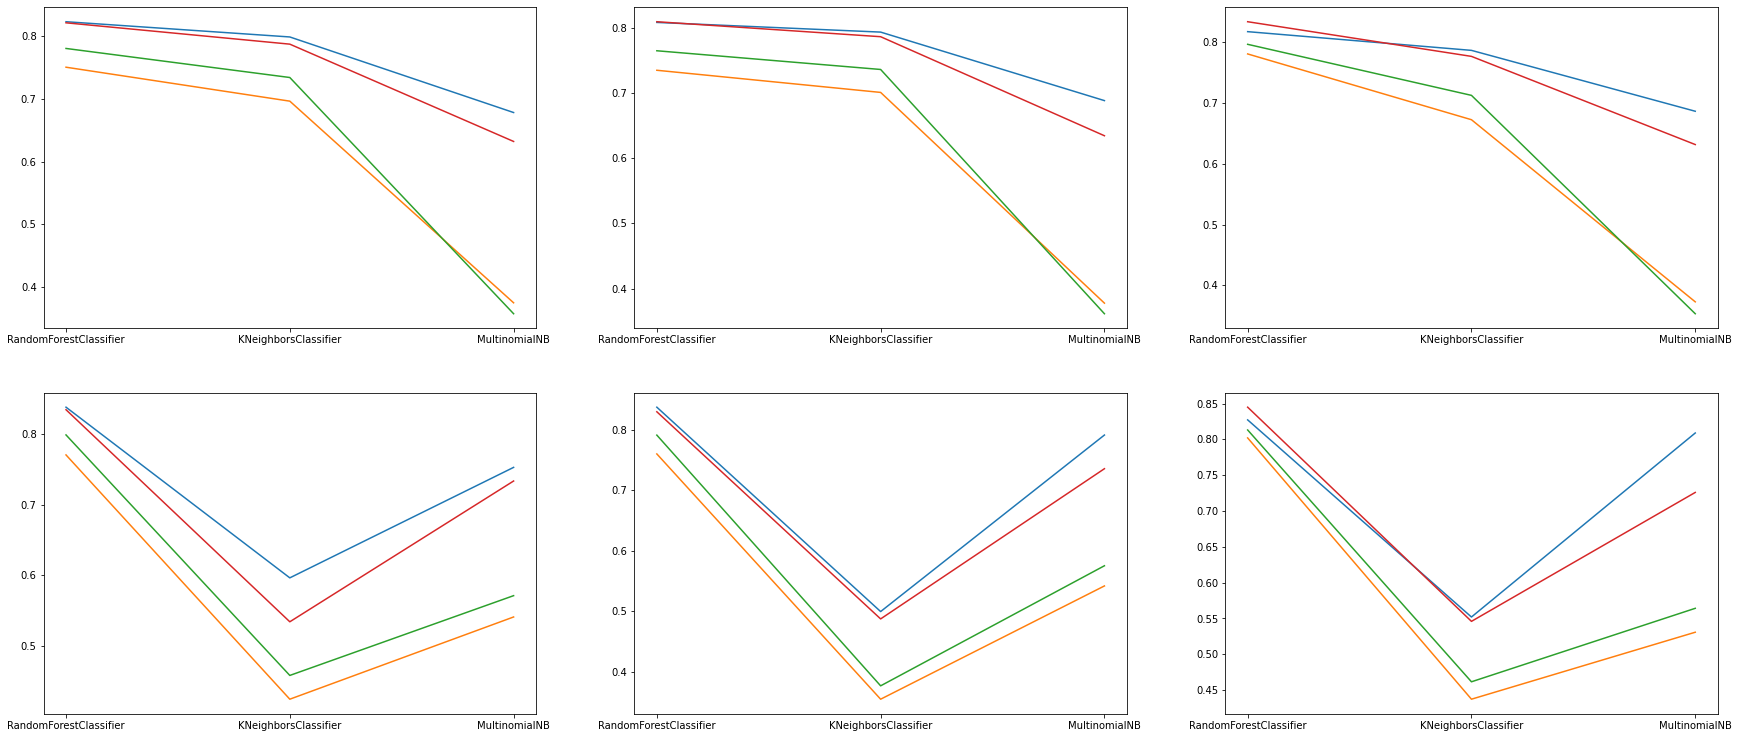

In [ ]:
plt.figure(figsize=(30,13))
plt.xticks(rotation=45)
res_t1 = pd.DataFrame(results_t1, index=['precision', 'recall', 'f1_measure','accuracy'])
res_t2 = pd.DataFrame(results_t2, index=['precision', 'recall', 'f1_measure','accuracy'])
res_t3 = pd.DataFrame(results_t3, index=['precision', 'recall', 'f1_measure','accuracy'])
res_c1 = pd.DataFrame(results_c1, index=['precision', 'recall', 'f1_measure','accuracy'])
res_c2 = pd.DataFrame(results_c2, index=['precision', 'recall', 'f1_measure','accuracy'])
res_c3 = pd.DataFrame(results_c3, index=['precision', 'recall', 'f1_measure','accuracy'])
plt.subplot(231)
plt.plot(res_t1.T)

plt.subplot(232)
plt.plot(res_t2.T)

plt.subplot(233)
plt.plot(res_t3.T)

plt.subplot(234)
plt.plot(res_c1.T)


plt.subplot(235)
plt.plot(res_c2.T)

plt.subplot(236)
plt.plot(res_c3.T)

plt.show()